In [27]:
# Created by: Chen Da
# Created on: 20191225

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random, warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

In [29]:
def predict_plot(df_name):
    data = pd.read_excel(path + 'rawdata/' + df_name + '.xlsx').iloc[:, pnasSubsetsIndex]  
    score = lr.score(data.iloc[:, 1:-1].values, data['class'].values)
#     print('Predict Score is %s.' % score)
    probability = lr.predict_proba(data.iloc[:, 1:-1].values)[:, 1]
    pre_df = pd.DataFrame(probability, columns=['pro'])
    pre_df['class'] = data['class']
    pre_df['id'] = data['id']
    predict_df = pre_df.reindex(columns=['id', 'pro', 'class'])
    positive = predict_df[predict_df['class'] == 1]
    negtive = predict_df[predict_df['class'] == 0]
    plt.figure(figsize=(20, 12))
    plt.scatter(x=positive['id'], y=positive['pro'], color='red')
    plt.scatter(x=negtive['id'], y=negtive['pro'], color='blue')
    plt.axhline(y=0.5, color='grey', linestyle='--', alpha=0.6)
    plt.xticks(rotation=90)
    plt.grid()
    plt.show()
    predict_df['pre_label'] = predict_df['pro'].apply(lambda x: round(x))
    predict_df['class'] = predict_df['class'].apply(lambda x: int(x))
    pre_0_right = predict_df[np.logical_and(predict_df['class'] == 0, predict_df['pre_label'] == 0)].shape[0]
    pre_0_wrong = predict_df[np.logical_and(predict_df['class'] == 0, predict_df['pre_label'] == 1)].shape[0]
    pre_1_right = predict_df[np.logical_and(predict_df['class'] == 1, predict_df['pre_label'] == 1)].shape[0]
    pre_1_wrong = predict_df[np.logical_and(predict_df['class'] == 1, predict_df['pre_label'] == 0)].shape[0]
    print('总体准确率为%s' % ((pre_0_right + pre_1_right) / predict_df.shape[0]))
    print('混淆矩阵为%s' % [pre_0_right, pre_0_wrong, pre_1_right, pre_1_wrong])
    return predict_df

In [30]:
pnasSubsetsIndex = [0,5,11,12,20,43,49,50,58,60,69,71,81,89,90,92,96,98,99,101,103]       
path = 'C:/Users/pc/OneDrive/PLTTECH/Project/02_疾病早筛/肺癌/'

In [31]:
model_data = pd.read_excel(path + 'rawdata/SVC/SVC_ModelRawData.xlsx')
lr = SVC(gamma=3, C=0.6, probability=True)
lr.fit(model_data.iloc[:, 1:-1].values, model_data['class'].values)

SVC(C=0.6, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=3, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

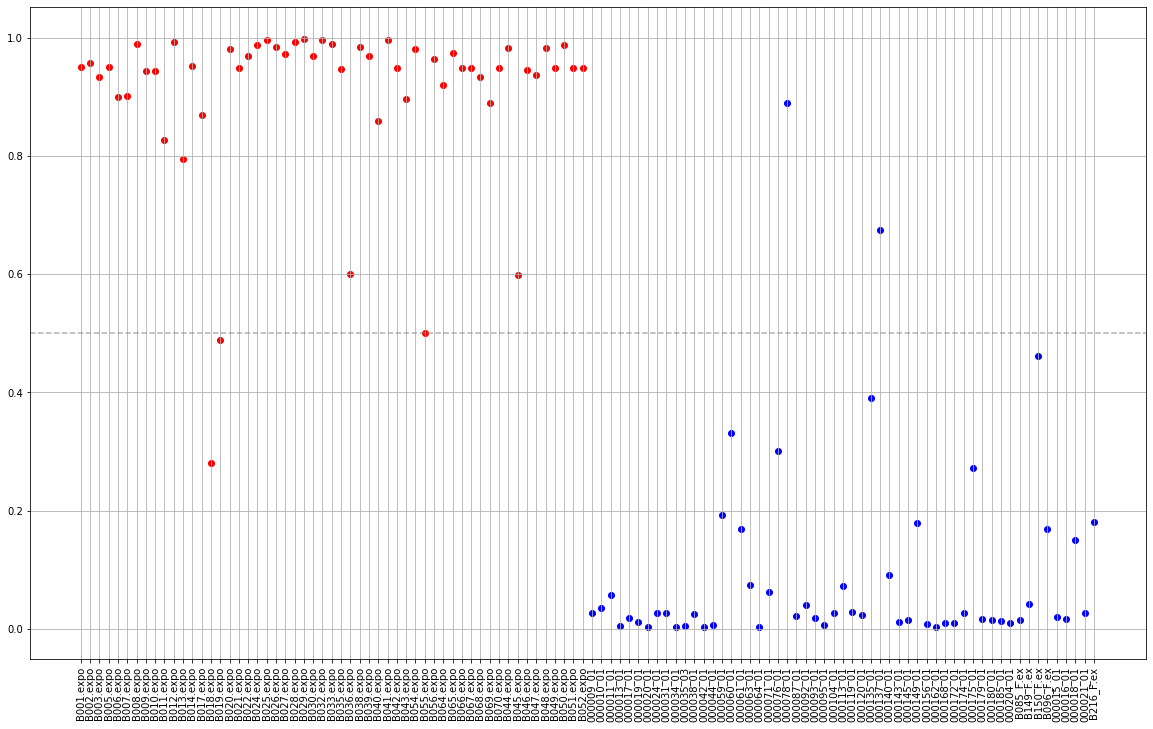

总体准确率为0.9545454545454546
混淆矩阵为[53, 2, 52, 3]


In [32]:
raw_pre = predict_plot('raw_data')

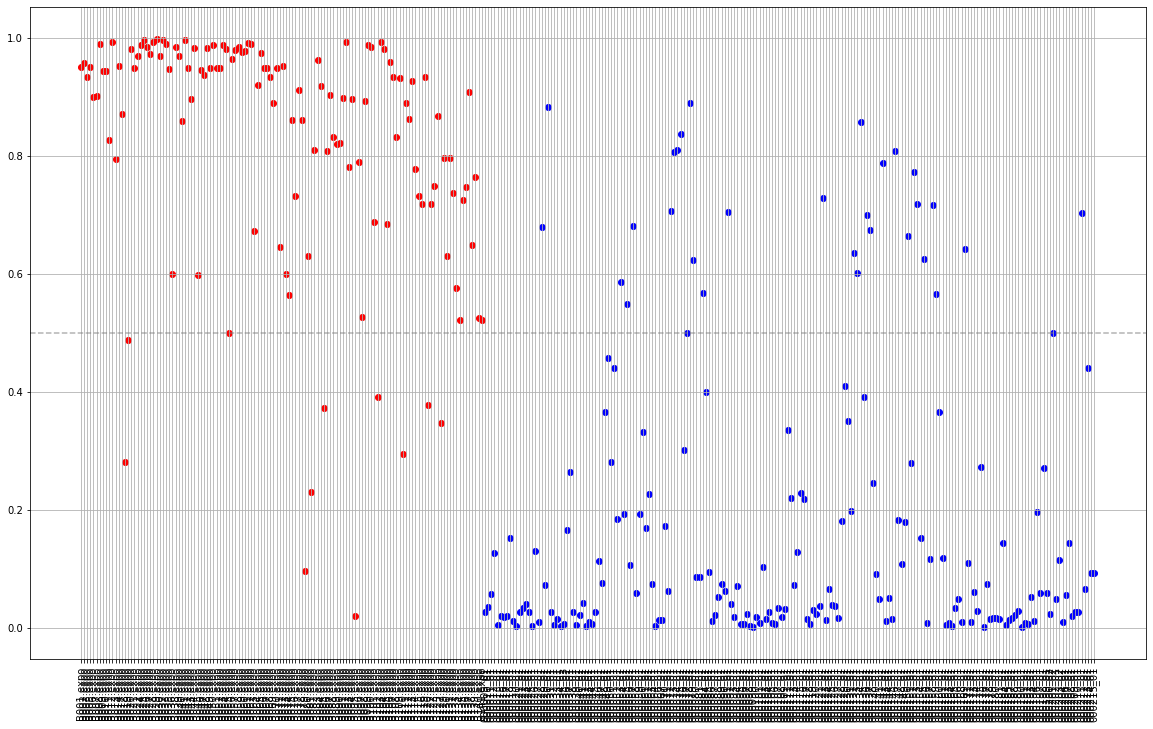

总体准确率为0.8757763975155279
混淆矩阵为[165, 29, 117, 11]


In [33]:
all_pre = predict_plot('all')

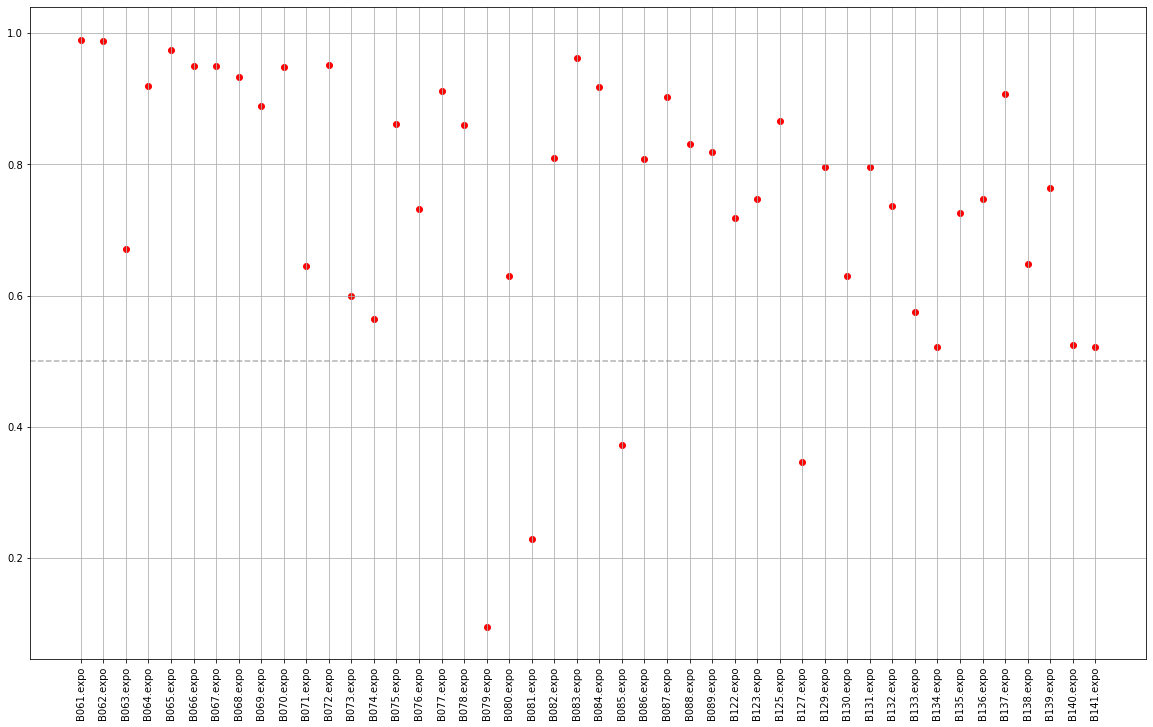

总体准确率为0.9130434782608695
混淆矩阵为[0, 0, 42, 4]


In [34]:
lung_pre = predict_plot('test_lung_cancer_new')

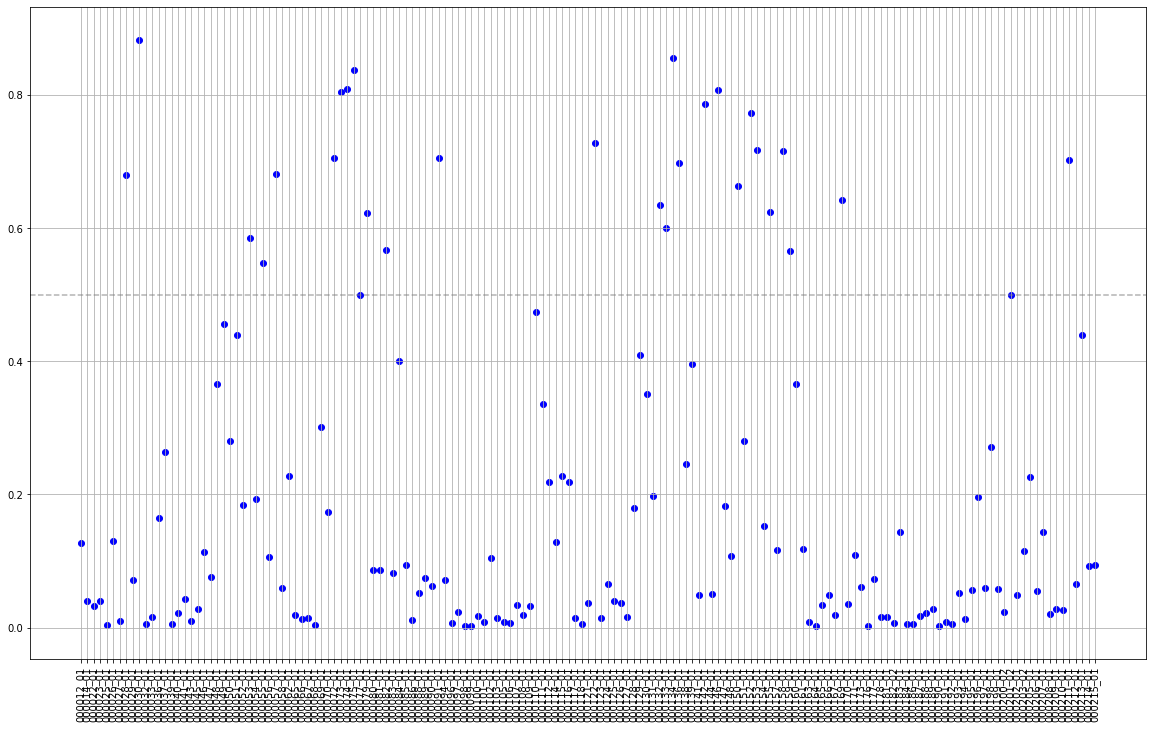

总体准确率为0.8280254777070064
混淆矩阵为[130, 27, 0, 0]


In [35]:
healthy_pre = predict_plot('test_healthy_new')
healthy_pre.to_excel('C:/Users/pc/Desktop/healthy_pre.xlsx', index=False)

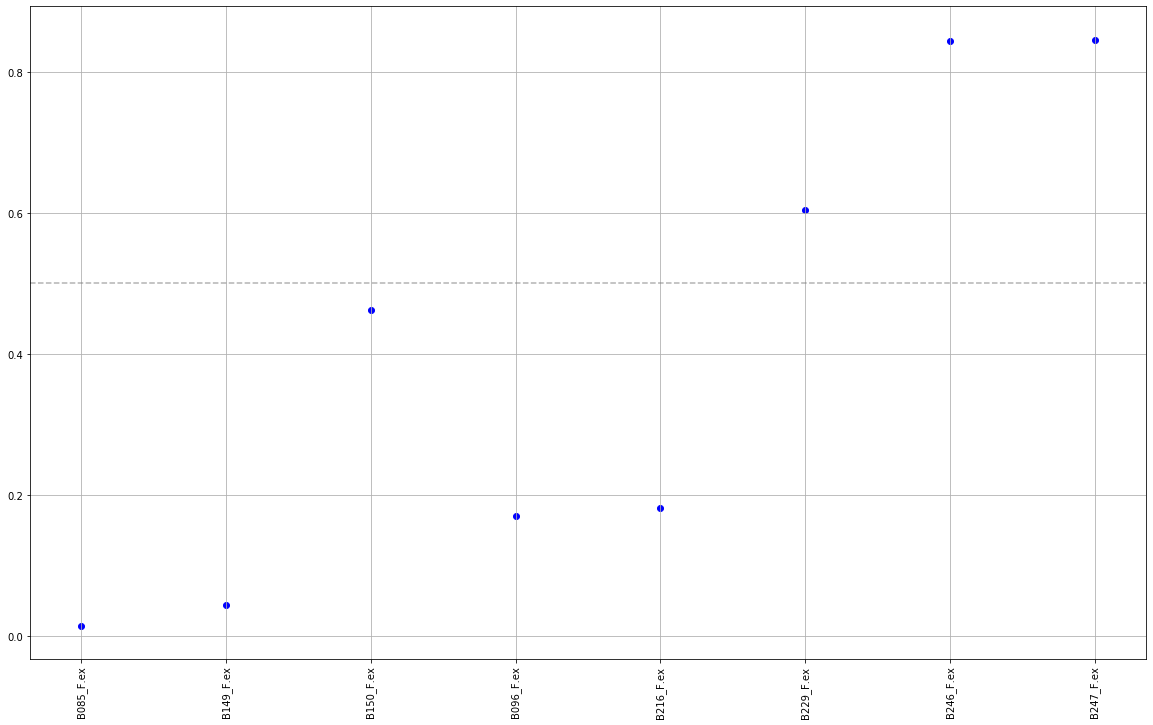

总体准确率为0.625
混淆矩阵为[5, 3, 0, 0]


In [36]:
plt_pre = predict_plot('test_PLT_healthy')